In [1]:
import matplotlib
import matplotlib.pyplot as plt
import branca.colormap as cmp
import cartopy.crs as ccrs
import geopandas as gpd
import folium
import xarray as xr
import numpy as np

In [2]:
caption = "Precipitation [inches/day]"

nws_precip_colors = ["#7be6fb", "#7cbcf8", "#5cace4", "#0c52cd", "#98f09d", "#1abb24", "#117d18", "#083e0c",
                     "#fff489", "#d6c300", "#8e8200", "#474100", "#f5a092", "#ed4a2f", "#831b0b", "#410d05",
                     "#e4a3d2", "#cc50a9", "#8a276e", "#531742", "#d0b8d0", "#a37ac2", "#ccf4fa", "#FCF9C5"]

precip_colormap = matplotlib.colors.ListedColormap(nws_precip_colors)

color_bins = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12] 

colormap = cmp.StepColormap(nws_precip_colors, vmin=0.01, vmax=12, index=color_bins, caption=caption)

colormap

In [ ]:
# nws_precip_colors = [
#     "#D3D3D3",  # < 0.01
#     "#04e9e7",  # 0.01 - 0.10 inches
#     "#019ff4",  # 0.10 - 0.25 inches
#     "#0300f4",  # 0.25 - 0.50 inches
#     "#02fd02",  # 0.50 - 0.75 inches
#     "#01c501",  # 0.75 - 1.00 inches
#     "#008e00",  # 1.00 - 1.50 inches
#     "#fdf802",  # 1.50 - 2.00 inches
#     "#e5bc00",  # 2.00 - 2.50 inches
#     "#fd9500",  # 2.50 - 3.00 inches
#     "#fd0000",  # 3.00 - 4.00 inches
#     "#d40000",  # 4.00 - 5.00 inches
#     "#bc0000",  # 5.00 - 6.00 inches
#     "#f800fd",  # 6.00 - 8.00 inches
#     "#9854c6",  # 8.00 - 10.00 inches
#     "#fdfdfd"   # 10.00+
# ]
# precip_colormap = matplotlib.colors.ListedColormap(nws_precip_colors)

# color_bins = [0,0.01,0.1,0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,5.0,6.0,8.0,10.0] 

# colormap = cmp.StepColormap(nws_precip_colors, vmin=0, vmax=10, index=color_bins, caption=caption)

# colormap

In [ ]:
# # Load your shapefile into a geopandas dataframe
# shp = gpd.read_file('shapefile/na14vol13_buffer_1p20deg.shp')
# lon_min, lat_min, lon_max, lat_max = shp.total_bounds

In [ ]:
# # Convert the GeoDataFrame to GeoJSON
# shp.to_file('na14v13_buffer_1p20deg.geojson', driver='GeoJSON')

In [3]:
filepath = 'data/st4_vol13_24h_2013.nc'
ds = xr.open_dataset(filepath)
data = ds['p01d_12z']
bounds = [[float(ds.lat.min().values), float(ds.lon.min().values)], [float(ds.lat.max().values), float(ds.lon.max().values)]]

dat = data[14,:,:]*0.0393701 ## mm to inches
dat = dat.where(dat >= 0.01, np.nan)

In [4]:
dat

<xarray.DataArray 'p01d_12z' (lat: 253, lon: 241)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     datetime64[ns] 2013-01-15T12:00:00
  * lon      (lon) float64 -85.51 -85.46 -85.41 -85.36 ... -73.61 -73.56 -73.51
  * lat      (lat) float64 30.84 30.89 30.94 30.99 ... 43.29 43.34 43.39 43.44

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())

dat.plot(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat', cmap=precip_colormap, add_colorbar=False, add_labels=False, alpha=0.6)

#ax.axis('off')

plt.savefig(f'radar.png', bbox_inches='tight', pad_inches=0, transparent=True)

plt.close()


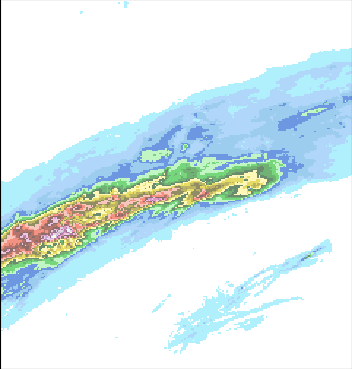

In [6]:
center_lat, center_lon = 35, -80
# Create a Map instance
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add the GeoJSON layer to the map
folium.GeoJson('na14v13_buffer_1p20deg.geojson').add_to(m)

layer1 = folium.FeatureGroup(name="Radar Daily", show=False)  

layer1.add_child(folium.raster_layers.ImageOverlay(name="overlay", image='radar.png', bounds=bounds))

colormap.add_to(m)

layer1.add_to(m)

# Add LatLngPopup
m.add_child(folium.LatLngPopup())